In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [2]:
data = pd.read_csv("rayalseemarainfall.csv")
data

,NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Latitude,Longitude
0,Rayalseema,1901,7.0,50.2,0.0,12.1,38.9,53.0,73.4,60.3,...,81.6,137.2,91.3,714.0,57.2,51.0,295.7,310.1,14.571831,78.026702
1,Rayalseema,1902,10.0,0.2,1.7,11.0,36.8,73.6,41.3,148.3,...,188.5,88.9,36.4,818.4,10.2,49.5,444.9,313.8,14.571831,78.026702
2,Rayalseema,1903,30.0,0.1,0.0,3.6,80.5,67.5,127.5,140.6,...,95.3,289.4,84.0,1138.2,30.1,84.1,555.3,468.7,14.571831,78.026702
3,Rayalseema,1904,14.8,0.0,1.7,7.1,58.8,39.8,75.1,19.4,...,111.5,4.4,16.1,433.4,14.8,67.6,219.0,132.0,14.571831,78.026702
4,Rayalseema,1905,6.5,6.8,17.0,18.3,44.2,66.1,50.9,219.3,...,180.2,55.4,2.0,703.2,13.3,79.5,372.8,237.6,14.571831,78.026702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Rayalseema,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,...,169.3,38.6,2.6,762.6,31.9,77.2,443.0,210.5,14.571831,78.026702
113,Rayalseema,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,...,104.6,37.8,12.8,551.9,0.9,64.3,331.5,155.2,14.571831,78.026702
114,Rayalseema,2015,1.9,0.0,13.4,73.4,39.7,73.0,43.1,123.6,...,106.7,383.8,52.2,1047.1,1.9,126.5,376.0,542.7,14.571831,78.026702
115,Rayalseema,2016,7.9,0.0,0.8,0.4,80.5,128.6,131.0,41.5,...,14.1,5.4,54.4,555.4,7.9,81.7,391.9,73.9,14.571831,78.026702


In [3]:
print(data.head())

         NAME  YEAR   JAN   FEB   MAR   APR   MAY   JUN    JUL    AUG  ...  \
0  Rayalseema  1901   7.0  50.2   0.0  12.1  38.9  53.0   73.4   60.3  ...   
1  Rayalseema  1902  10.0   0.2   1.7  11.0  36.8  73.6   41.3  148.3  ...   
2  Rayalseema  1903  30.0   0.1   0.0   3.6  80.5  67.5  127.5  140.6  ...   
3  Rayalseema  1904  14.8   0.0   1.7   7.1  58.8  39.8   75.1   19.4  ...   
4  Rayalseema  1905   6.5   6.8  17.0  18.3  44.2  66.1   50.9  219.3  ...   

     OCT    NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec   Latitude  \
0   81.6  137.2  91.3   714.0     57.2     51.0    295.7    310.1  14.571831   
1  188.5   88.9  36.4   818.4     10.2     49.5    444.9    313.8  14.571831   
2   95.3  289.4  84.0  1138.2     30.1     84.1    555.3    468.7  14.571831   
3  111.5    4.4  16.1   433.4     14.8     67.6    219.0    132.0  14.571831   
4  180.2   55.4   2.0   703.2     13.3     79.5    372.8    237.6  14.571831   

   Longitude  
0  78.026702  
1  78.026702  
2  78

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().any()

NAME         False
YEAR         False
JAN          False
FEB          False
MAR          False
APR          False
MAY          False
JUN          False
JUL          False
AUG          False
SEP          False
OCT          False
NOV          False
DEC          False
ANNUAL       False
Jan-Feb      False
Mar-May      False
Jun-Sep      False
Oct-Dec      False
Latitude     False
Longitude    False
dtype: bool

In [6]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [7]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Latitude,Longitude
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,1.170000e+02,1.170000e+02
mean,1959.000000,9.800000,5.582906,8.054701,19.548718,50.641880,65.494872,96.005128,107.494872,131.907692,135.024786,101.229915,34.202564,764.988034,15.382906,78.245299,400.902564,270.457265,1.457183e+01,7.802670e+01
std,33.919021,18.965031,11.574819,13.616689,17.544076,37.360714,34.372871,45.582908,56.146888,51.466424,70.084160,72.358789,37.477636,150.594922,21.739426,40.842932,101.423534,102.818323,1.605597e-14,1.284478e-13
min,1901.000000,0.000000,0.000000,0.000000,0.400000,4.100000,23.500000,24.400000,13.600000,34.800000,4.400000,0.000000,0.000000,433.400000,0.000000,14.000000,219.000000,34.200000,1.457183e+01,7.802670e+01
25%,1930.000000,0.200000,0.000000,0.400000,8.100000,29.300000,45.200000,65.600000,69.000000,90.800000,87.400000,41.700000,6.800000,651.400000,1.300000,52.500000,328.200000,205.900000,1.457183e+01,7.802670e+01
50%,1959.000000,2.100000,0.900000,4.000000,12.300000,41.400000,57.700000,87.400000,98.500000,131.500000,124.400000,86.600000,20.000000,743.600000,7.600000,67.600000,387.700000,258.200000,1.457183e+01,7.802670e+01
75%,1988.000000,9.800000,5.500000,10.900000,26.800000,55.300000,76.700000,125.200000,140.600000,167.400000,176.900000,141.300000,51.800000,869.100000,17.900000,93.500000,452.200000,330.400000,1.457183e+01,7.802670e+01
max,2017.000000,115.300000,81.000000,86.900000,93.500000,239.800000,270.700000,245.200000,290.100000,272.500000,352.500000,383.800000,198.700000,1277.700000,122.500000,266.800000,736.800000,544.300000,1.457183e+01,7.802670e+01


In [19]:
SUBDIVISION=data
num_of_subdivs = SUBDIVISION.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
SUBDIVISION

Total # of Subdivs: 2457


,NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Latitude,Longitude
0,Rayalseema,1901,7.0,50.2,0.0,12.1,38.9,53.0,73.4,60.3,...,81.6,137.2,91.3,714.0,57.2,51.0,295.7,310.1,14.571831,78.026702
1,Rayalseema,1902,10.0,0.2,1.7,11.0,36.8,73.6,41.3,148.3,...,188.5,88.9,36.4,818.4,10.2,49.5,444.9,313.8,14.571831,78.026702
2,Rayalseema,1903,30.0,0.1,0.0,3.6,80.5,67.5,127.5,140.6,...,95.3,289.4,84.0,1138.2,30.1,84.1,555.3,468.7,14.571831,78.026702
3,Rayalseema,1904,14.8,0.0,1.7,7.1,58.8,39.8,75.1,19.4,...,111.5,4.4,16.1,433.4,14.8,67.6,219.0,132.0,14.571831,78.026702
4,Rayalseema,1905,6.5,6.8,17.0,18.3,44.2,66.1,50.9,219.3,...,180.2,55.4,2.0,703.2,13.3,79.5,372.8,237.6,14.571831,78.026702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Rayalseema,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,...,169.3,38.6,2.6,762.6,31.9,77.2,443.0,210.5,14.571831,78.026702
113,Rayalseema,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,...,104.6,37.8,12.8,551.9,0.9,64.3,331.5,155.2,14.571831,78.026702
114,Rayalseema,2015,1.9,0.0,13.4,73.4,39.7,73.0,43.1,123.6,...,106.7,383.8,52.2,1047.1,1.9,126.5,376.0,542.7,14.571831,78.026702
115,Rayalseema,2016,7.9,0.0,0.8,0.4,80.5,128.6,131.0,41.5,...,14.1,5.4,54.4,555.4,7.9,81.7,391.9,73.9,14.571831,78.026702


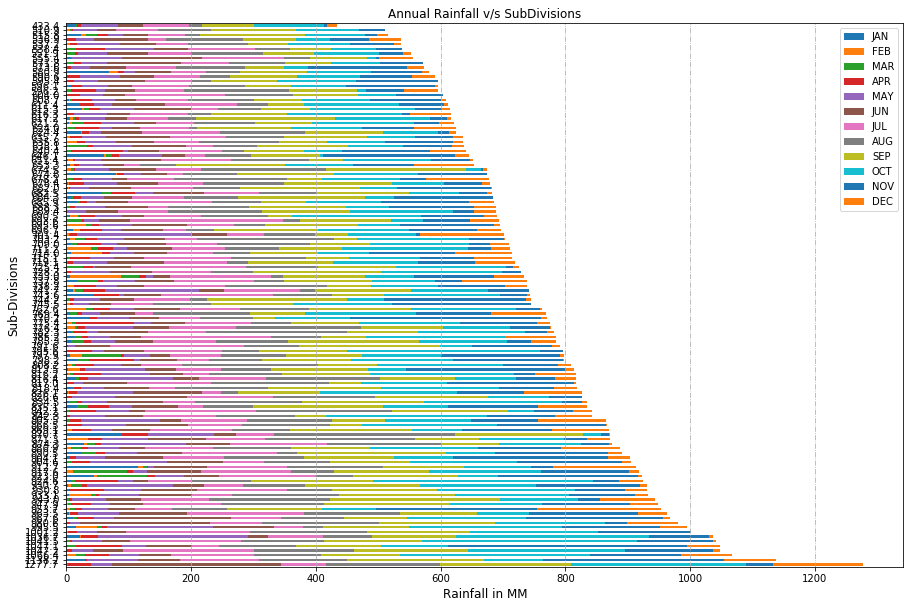

In [9]:
data[["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC",
      "ANNUAL"]].groupby("ANNUAL").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Divisions",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

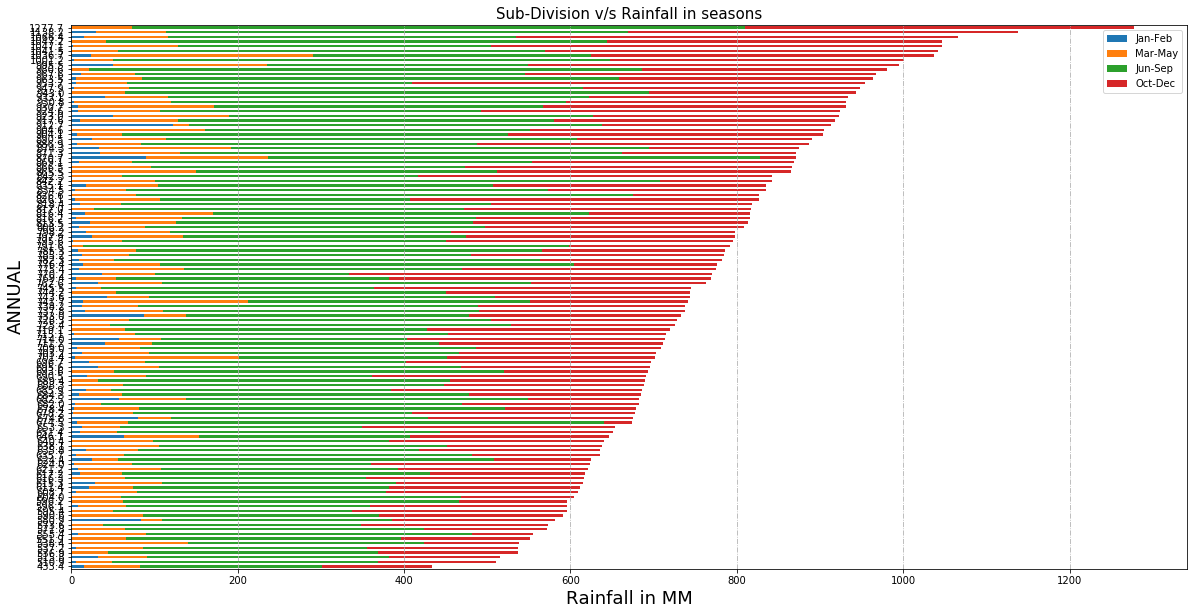

In [10]:
data[['ANNUAL','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']
    ].groupby("ANNUAL").sum().plot(kind="barh",stacked=True,figsize=(20,10))
plt.title("Sub-Division v/s Rainfall in seasons",size=15)
plt.xlabel("Rainfall in MM",size=18)
plt.ylabel("ANNUAL",size=18)
plt.grid(axis="x",linestyle="-.")
plt.show()

In [11]:
data = data.fillna(np.mean(data))
data

,NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Latitude,Longitude
0,Rayalseema,1901,7.0,50.2,0.0,12.1,38.9,53.0,73.4,60.3,...,81.6,137.2,91.3,714.0,57.2,51.0,295.7,310.1,14.571831,78.026702
1,Rayalseema,1902,10.0,0.2,1.7,11.0,36.8,73.6,41.3,148.3,...,188.5,88.9,36.4,818.4,10.2,49.5,444.9,313.8,14.571831,78.026702
2,Rayalseema,1903,30.0,0.1,0.0,3.6,80.5,67.5,127.5,140.6,...,95.3,289.4,84.0,1138.2,30.1,84.1,555.3,468.7,14.571831,78.026702
3,Rayalseema,1904,14.8,0.0,1.7,7.1,58.8,39.8,75.1,19.4,...,111.5,4.4,16.1,433.4,14.8,67.6,219.0,132.0,14.571831,78.026702
4,Rayalseema,1905,6.5,6.8,17.0,18.3,44.2,66.1,50.9,219.3,...,180.2,55.4,2.0,703.2,13.3,79.5,372.8,237.6,14.571831,78.026702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Rayalseema,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,...,169.3,38.6,2.6,762.6,31.9,77.2,443.0,210.5,14.571831,78.026702
113,Rayalseema,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,...,104.6,37.8,12.8,551.9,0.9,64.3,331.5,155.2,14.571831,78.026702
114,Rayalseema,2015,1.9,0.0,13.4,73.4,39.7,73.0,43.1,123.6,...,106.7,383.8,52.2,1047.1,1.9,126.5,376.0,542.7,14.571831,78.026702
115,Rayalseema,2016,7.9,0.0,0.8,0.4,80.5,128.6,131.0,41.5,...,14.1,5.4,54.4,555.4,7.9,81.7,391.9,73.9,14.571831,78.026702


In [12]:
print("\nShape: ",data.shape)


Shape:  (117, 21)


In [13]:
print("Group by: ")
data.groupby('YEAR').size()

Group by: 


YEAR
1901    1
1902    1
1903    1
1904    1
1905    1
       ..
2013    1
2014    1
2015    1
2016    1
2017    1
Length: 117, dtype: int64

Text(0.5, 1.0, 'type of our data ')

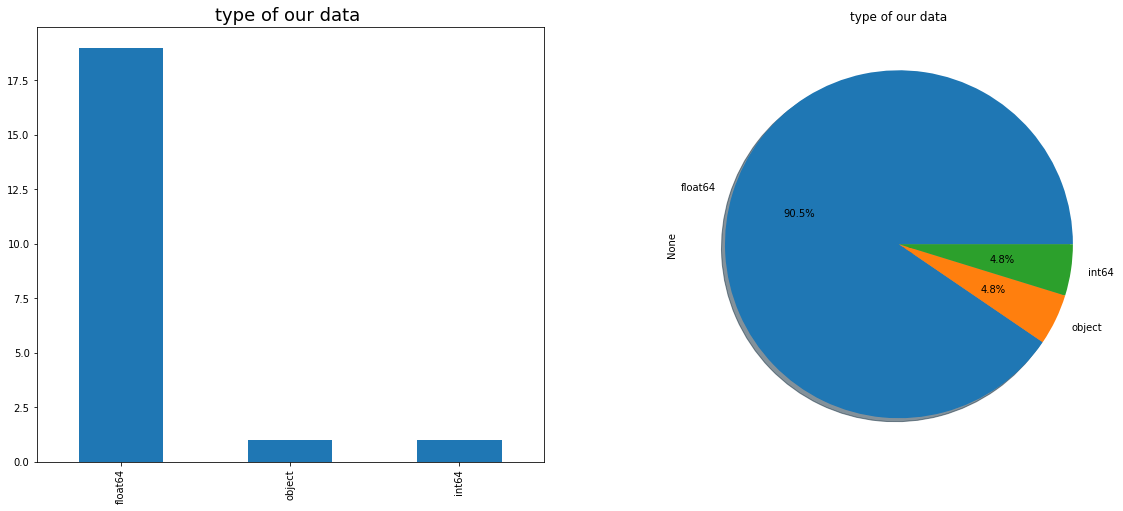

In [14]:
fig,arr= plt.subplots(1, 2, figsize=(20, 8))

data.dtypes.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,ax=arr[1])
arr[1].set_title("type of our data ", fontsize=18)

data.dtypes.value_counts().plot(kind='bar',ax=arr[0])
plt.title('type of our data');
arr[0].set_title("type of our data ", fontsize=18)

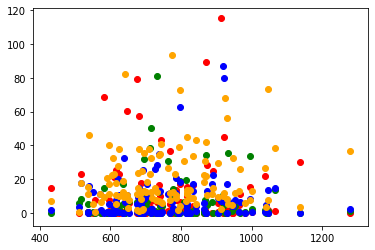

In [15]:
#Scatter Plot of annual and january attributes: 

plt.scatter(data.ANNUAL,data.JAN,color='red')
plt.scatter(data.ANNUAL,data.FEB,color='green')
plt.scatter(data.ANNUAL,data.MAR,color='blue')
plt.scatter(data.ANNUAL,data.APR,color='orange')

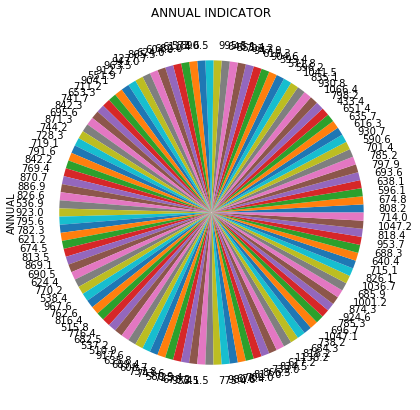

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (7,7))
data.ANNUAL.value_counts().plot(kind='pie')
plt.title('ANNUAL INDICATOR')
plt.show()

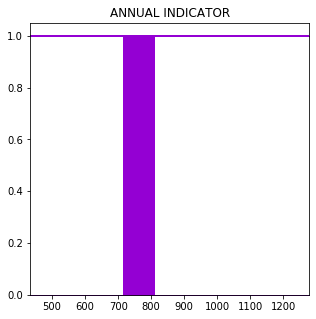

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
data.ANNUAL.value_counts().plot(kind='area',color='darkviolet')
plt.title('ANNUAL INDICATOR')
plt.show()

In [24]:
dd = data.drop(['NAME','YEAR','ANNUAL','Jan-Feb','Mar-May', 'Jun-Sep', 'Oct-Dec', 'Latitude', 'Longitude'], axis=1)
s = ((dd.head().sum()))
months = list(dd.head())
print("Months are: ",months)
print(s)
k=0
for i in dd.sum():
     k = k + i
print("Total recorded rainfall in these 12 months",s)
probability=list(s/k)
print(probability)
max_rainfall=max(probability)
for i in range(len(months)):
    if probability[i]==max_rainfall:
        print("Maximum Rainfall will be in the month of",months[i])
min_rainfall=min(probability)
for i in range(len(months)):
    if probability[i]==min_rainfall:
        print("Minimum Rainfall will be in the month of",months[i])

Months are:  ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
JAN     68.3
FEB     57.3
MAR     20.4
APR     52.1
MAY    259.2
JUN    300.0
JUL    368.2
AUG    587.9
SEP    631.6
OCT    657.1
NOV    575.3
DEC    229.8
dtype: float64
Total recorded rainfall in these 12 months JAN     68.3
FEB     57.3
MAR     20.4
APR     52.1
MAY    259.2
JUN    300.0
JUL    368.2
AUG    587.9
SEP    631.6
OCT    657.1
NOV    575.3
DEC    229.8
dtype: float64
[0.000763097797183577, 0.0006401977127177008, 0.0002279237930094432, 0.0005820994909701958, 0.002895972899414102, 0.0033518204854329887, 0.00411380100912142, 0.0065684508779535146, 0.007056699395331586, 0.007341604136593389, 0.006427674417565327, 0.002567494491841669]
Maximum Rainfall will be in the month of OCT
Minimum Rainfall will be in the month of MAR


Mean Squared Error = 3.913311057651042e-26
Root Mean Squared Error = 1.978209053070742e-13
Mean Absolute Error = 1.4210854715202004e-13
r2_score = 1.0


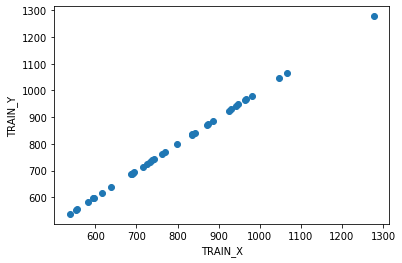

In [87]:
#training of model using Multiple Linear Regression: 
data
from sklearn import linear_model
y = data['ANNUAL']
x = data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, shuffle = False)

lm = linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred = lm.predict(test_x)

print("Mean Squared Error =",mean_squared_error(test_y,pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred)))
print("Mean Absolute Error =",mean_absolute_error(test_y,pred))
print("r2_score =",r2_score(test_y,pred))

plt.scatter(pred, test_y)
plt.xlabel('TRAIN_X')
plt.ylabel('TRAIN_Y')
plt.show()

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
data = pd.read_csv('rayalseemarainfall.csv')
data.info()
data.dropna(how='any', inplace=True)
# Any results you write to the current directory are saved as output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 21 columns):
NAME         117 non-null object
YEAR         117 non-null int64
JAN          117 non-null float64
FEB          117 non-null float64
MAR          117 non-null float64
APR          117 non-null float64
MAY          117 non-null float64
JUN          117 non-null float64
JUL          117 non-null float64
AUG          117 non-null float64
SEP          117 non-null float64
OCT          117 non-null float64
NOV          117 non-null float64
DEC          117 non-null float64
ANNUAL       117 non-null float64
Jan-Feb      117 non-null float64
Mar-May      117 non-null float64
Jun-Sep      117 non-null float64
Oct-Dec      117 non-null float64
Latitude     117 non-null float64
Longitude    117 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 19.3+ KB


C:\Users\SIVA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  after removing the cwd from sys.path.


Max: 1277.7 ocurred in [1996]
Min: 433.4 ocurred in [1904]
Mean: 764.9880341880344


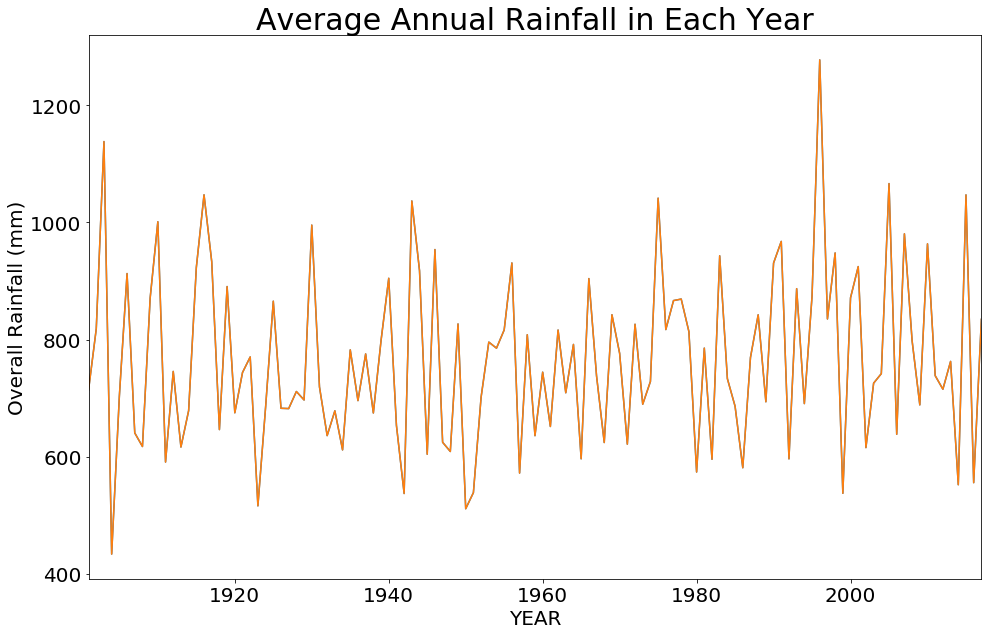

In [35]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = data.groupby('YEAR').sum()['ANNUAL']
dfg.plot('line', title='Average Annual Rainfall in Each Year', fontsize=20)
data.groupby('YEAR').sum()['ANNUAL'].plot()
plt.xticks()
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Min: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))


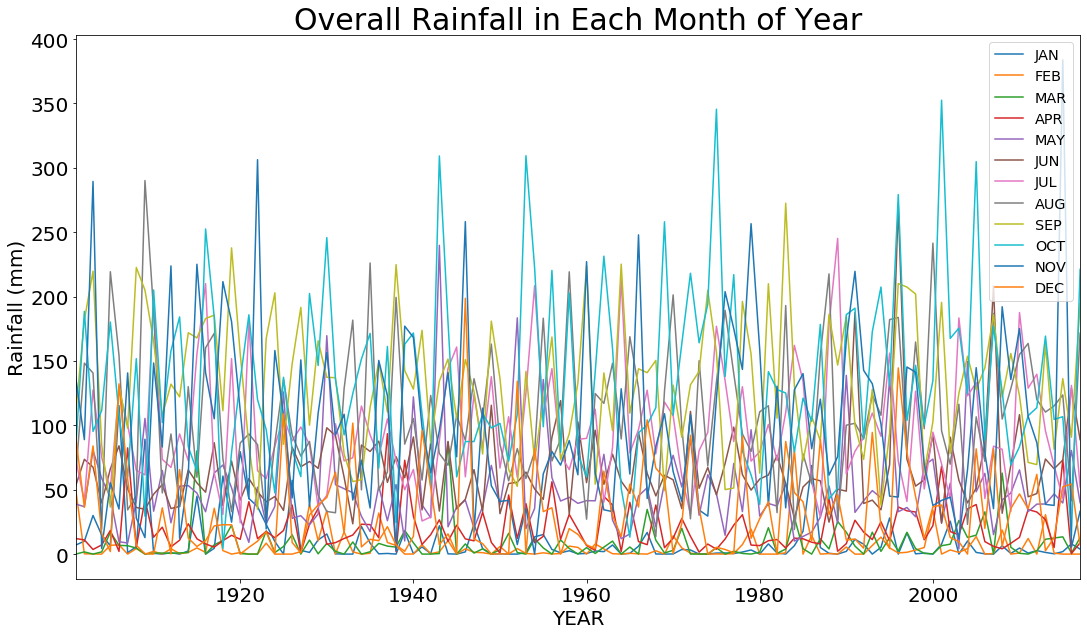

In [36]:
months = data.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
data.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks( rotation = 0)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

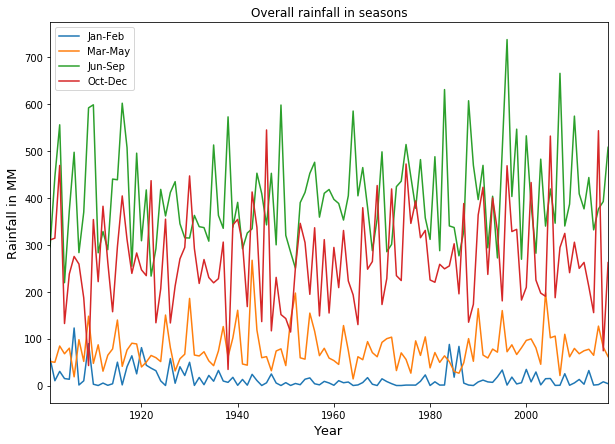

In [93]:
data[['YEAR','Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.title('Overall rainfall in seasons')
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

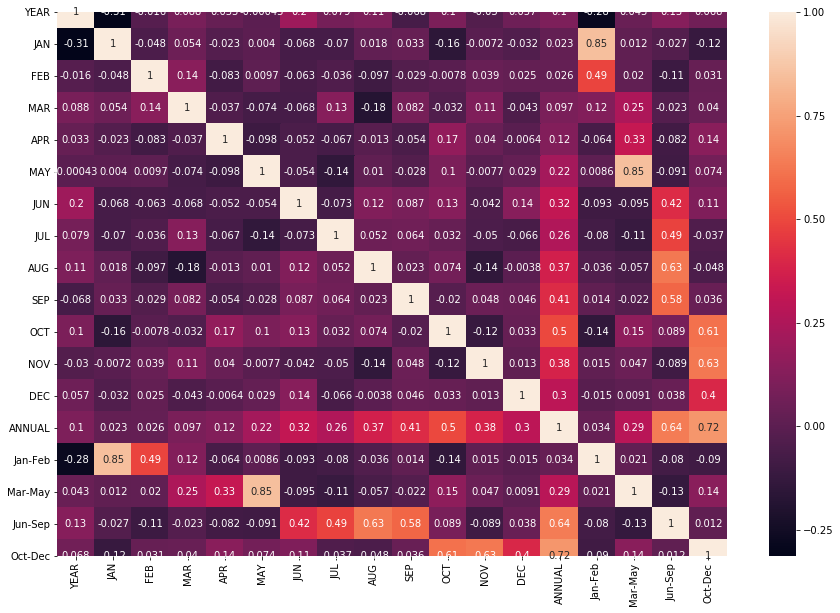

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(data[['YEAR','JAN','FEB','MAR','APR','MAY','JUN',
                  'JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL',
                  'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']
                ].corr(),annot=True)
plt.show()

MAD (Training Data): 45.509796436153266
MAD (Test Data): 49.098403174584064


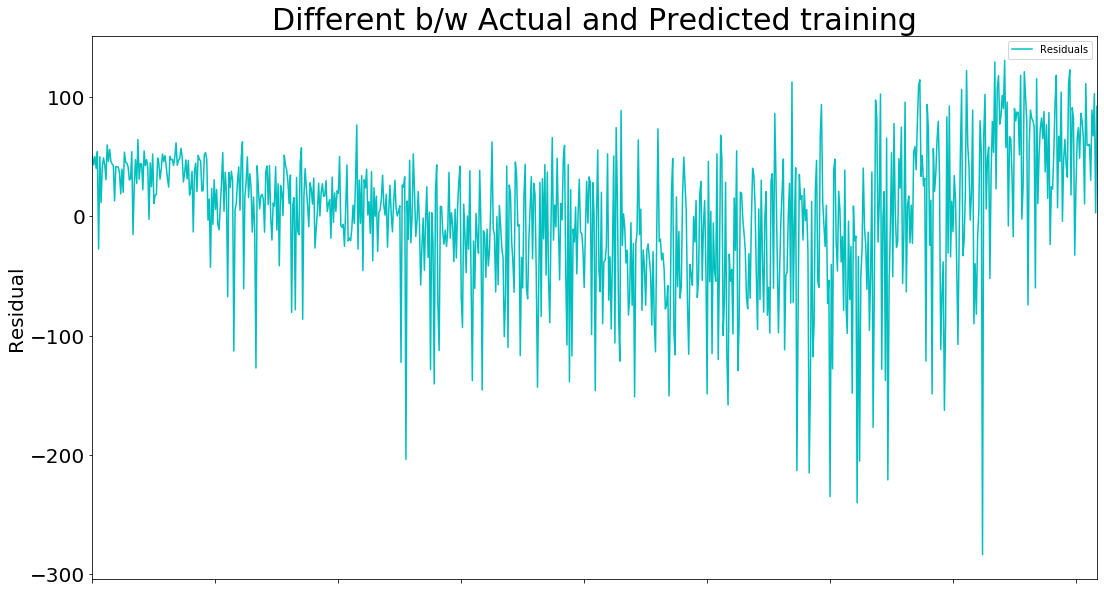

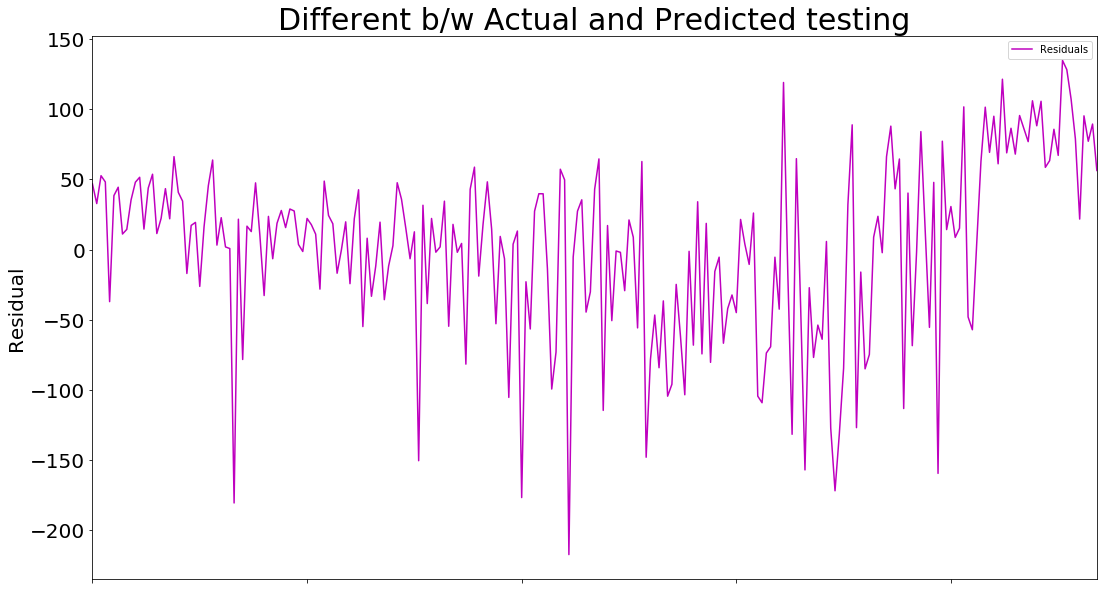

In [37]:
df2 = data[[months[0],months[1],months[2],months[3]]]

df2.columns = np.array(['x1','x2','x3','x4'])

for k in range(1,9):
    df3 = data[[months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])


#df2 = pd.concat([df2, pd.get_dummies(df2[months[0]])], axis=1)
df2.drop('x1', axis=1,inplace=True)

msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
#print(reg.coef_)
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted training', color = 'c', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted testing', color='m', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [55]:
X=np.asanyarray(data[['YEAR']]).astype('int')
y=np.asanyarray(data[['ANNUAL','JAN','FEB','MAR','APR','MAY','JUN',
                      'JUL','AUG','SEP','OCT','NOV','DEC',
                      'Jan-Feb','Mar-May','Jun-Sep',
                      'Oct-Dec']]).astype('int')
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)


y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


predicted = random_forest_model.predict([[2045]])
predicted

(117, 1)
(117, 17)
-------Test Data--------
MAE: 43.00304479768598
MSE: 5132.719877264601
RMSE: 71.64300298887953

-------Train Data--------
MAE: 35.807037813237805
MSE: 3078.624426693992
RMSE: 55.48535326276649
-----------Training Accuracy------------
17.299999999999997
-----------Testing Accuracy------------
-11.799999999999999


C:\Users\SIVA\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\SIVA\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  

array([[744.92222421,   3.43765609,   5.44539375,  15.9429455 ,
         20.79327415,  47.22962857,  73.31682716,  86.95562209,
        106.49425163, 123.07655613, 130.61734303,  98.31561425,
         27.98796044,   8.96657953,  85.33763813, 391.22489029,
        257.95283407]])